<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT421/blob/main/herrera_module_K.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **MODULE J:** Ordinary Differential Equations, Part II
# **AUTHOR:** Benjamin Joseph L. Herrera
# **CLASS:** MAT 421
# **DATE:** 7 APR 2024

## ⚠️ Run these commands prior to running anything

In [14]:
!pip install numpy as np 
!pip install scipy
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


## Numerical Error and Instability

In the realm of ODEs, we define accuracy as the ODE's ability to approximate as much as possible to the solution via a step function of $h$. The stability aspect, on the other hand, is the ability of the ODE to keep its accuracy as it continues to approximate over time. Hence, the step function $h$.

We can demonstrate this notion by plotting out the Euler methods and the trapezoidal formulas on a $cos()$ plot of the pendulum problem.

In [15]:
# Imports
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np

In [22]:
# Define variables
step_var = 0.1
timing = np.arange(0, 2, step_var)
width = 4
init_state = [[1], [0]]

In [24]:
# Define ODE methods
explicit = np.array([[1, step_var], [-(width**2) * step_var, 1]])
implicit = inv(np.array([[1, -step_var], [width**2 * step_var, 1]]))
trap = np.dot(
    inv(np.array([[1, -step_var / 2], [width**2 * step_var / 2, 1]])),
    np.array([[1, step_var / 2], [-(width**2) * step_var / 2, 1]]),
)

In [32]:
# Execute integrations
init_state = np.array(init_state)
state_of_explicit = np.zeros((len(timing), 2))
state_of_implicit = np.zeros((len(timing), 2))
state_of_trap = np.zeros((len(timing), 2))
state_of_explicit[0, :] = init_state.T
state_of_implicit[0, :] = init_state.T
state_of_trap[0, :] = init_state.T
for j in range(0, len(timing)-1):
    state_of_explicit[j+1, :] = np.dot(explicit,state_of_explicit[j, :])
    state_of_implicit[j+1, :] = np.dot(implicit,state_of_implicit[j, :])
    state_of_trap[j+1, :] = np.dot(trap,state_of_trap[j, :])

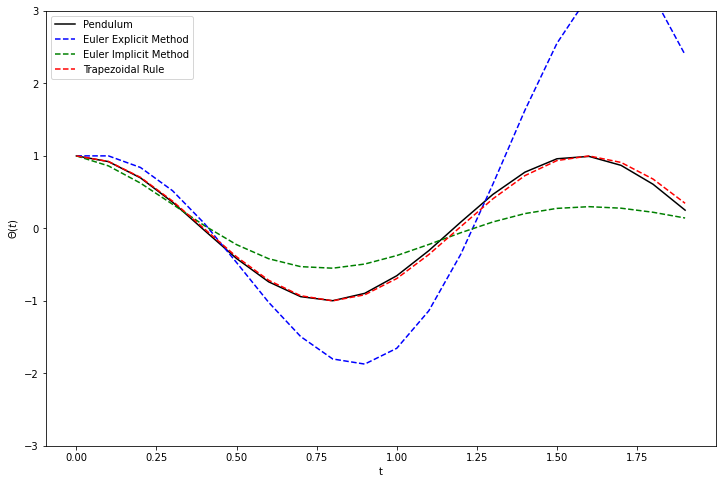

In [37]:
# Plot results
plt.figure(figsize=(12, 8))
plt.ylim([-3, 3])
plt.xlabel("t")
plt.ylabel("$\Theta(t)$")
plt.plot(timing, np.cos(width * timing), "k")
plt.plot(timing, state_of_explicit[:, 0], "b--")
plt.plot(timing, state_of_implicit[:, 0], "g--")
plt.plot(timing, state_of_trap[:, 0], "r--")
plt.legend(["Pendulum", "Euler Explicit Method", "Euler Implicit Method", "Trapezoidal Rule"])
plt.show()

In this example you can see that the Euler Explicit Method is very unstable and inaccurate. Its counterpart, the Euler Implicit Method is much more stable, but not as accurate as the trapezoidal method. Here, we can see that it is very close to the pendulum swinging.

## Predictor-Corrector Methods

A predictor-corrector method solves the issue where finding the initial coefficients of an ODE is very hard. The predictor first finds the solution of an ODE at timestep $t_{j+1}$. Afterwards, we use the corrector method to improve an ODE's accuracy.

A very well known predictor-corrector method is the Runge Kutta Method. It uses the following function to improve accuracies of ODEs

$$S(t_{k+1}) = S(t_k + h) = \sum_{k=0}^{n}\frac{1}{k!}S^{(k)}(t_k)h^k$$

If we derive the function above we get:

$$S(t+h) S + (a_1 + a_2) \cdot F \cdot h + a_1 \left[\frac{\partial F}{\partial h}\cdot p + \frac{\partial F}{\partial S} \cdot F\right] \cdot h^2$$

making it:

$$S(t_{k+1}) = S(t_k) + \frac{1}{2} (t_1 + t_2) \cdot h$$